Kendra Robbins

OSM Week 6

Asset Pricing

Scott Condie

In [4]:
import numpy as np
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like #importing pandas_datareader gives me an error without this line
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime
from scipy import optimize as opt


# Lucas Tree Exercises

## Exercise 1

In [ ]:
'''
my initial attempt at cleaning the data by myself hahahahahhahahahahahahahahahahah 

consumption = pd.read_csv("PCECC96.csv",names=['date','c']) #last available value is 1/1/2018
cons = consumption[1:]
cons.index = pd.to_datetime(cons['date'],format="%Y-%m-%d")
cons = cons.drop(columns = "date")

defl = pd.read_csv("GDPDEF.csv",names=['date','d'])
defl = defl[1:]
defl.index = pd.to_datetime(defl['date'], format="%Y-%m-%d")
defl = defl.drop(columns='date')

#these subsets of cons and defl contain only the data points of interest. 
c_lim = cons['2013-01-01':'2018-01-01']
d_lim = defl['2013-01-01':'2018-01-01']

w5 = pd.read_csv('WILL5000INDFC.csv', names = ['date','w'])
w5 = w5[1:] 
w5.index = pd.to_datetime(w5["date"], format="%Y-%m-%d")
w5 = w5.drop(columns = 'date')

w1013 = w5.loc['2013-10-01']['w']
w0114 = w5.loc['2014-01-02']['w']
w0414 = w5.loc['2014-04-01']['w']
w0714 = w5.loc['2014-07-01']['w']
w1014 = w5.loc['2014-10-01']['w']

w0115 = w5.loc['2015-01-02']['w']
w0415 = w5.loc['2015-04-01']['w']
w0715 = w5.loc['2015-07-01']['w']
w1015 = w5.loc['2015-10-01']['w']

w0116 = w5.loc['2015-12-31']['w']
w0416 = w5.loc['2016-04-01']['w']
w0716 = w5.loc['2016-07-01']['w']
w1016 = w5.loc['2016-09-30']['w'] #the dataset doesn't have data for 10/1/2016

w0117 = w5.loc['2017-01-03']['w'] #the dataset doesn't have data for 1/1/2017 or 1/2/2017 or 12/31/16
w0417 = w5.loc['2017-03-31']['w'] #etc
w0717 = w5.loc['2017-06-30']['w']
w1017 = w5.loc['2017-10-02']['w']

w0118 = w5.loc['2018-01-02']['w']


wvec = np.zeros(18)

wvec[0] =w1013 
wvec[1] = w0114 
wvec[2]=w0414 
wvec[3]=w0714 
wvec[4]=w1014 

wvec[5] = w0115 
wvec[6]=w0415 
wvec[7]=w0715 
wvec[8]=w1015 

wvec[9]=w0116 
wvec[10]=w0416 
wvec[11]=w0716 
wvec[12]=w1016 

wvec[13]=w0117 
wvec[14]=w0417 
wvec[15]=w0717
wvec[16]=w1017 

wvec[17]=w0118 

#get arrays of consumption and GDP Deflator 
C = np.array(c_lim['c'])
D = np.array(d_lim['d'])

# determine real returns in w5 by accounting for inflation 
def inflation(defl):
    this function computes inflation 
    input should be a vector of GDP deflator values 
    
    I want my inflation vector and my w5 vefor to be the same size despite
    not being able to compute inflation at t=0, so Ill use inflation at t=1
    for inflation at t=0.
    
    infl_vec = np.zeros(np.size(defl)-1)

    for i in range(np.size(defl)-1):
        
        if i==0:
            dt = float(defl[1])
            dt_1 = float(defl[0])
            infl_vec[i] = (dt - dt_1) * 100 / dt_1
        
        else:
            dt = float(defl[i])
            dt_1 = float(defl[i-1])
            infl_vec[i] = (dt - dt_1) * 100 / dt_1
    return infl_vec 

    
def adjust_w5(w5, defl, percent=True):
    #this function uses the inflation() function to compute inflation
    and then adjusts w5 to account for inflation
    
    percent==True if the unit of w5 is percent
    percent==False if the unit of w5 is in levels#
    
    infl = inflation(defl) #get inflation
    
    #need to handle that infl is 1 unit smaller than w5 
    if percent==True: 
        w5_adjusted = w5 - infl 
        
        
    else: 
        
'''


In [5]:
#as a utility maximizing agent i will use this data cleaning from scott 
#thank u scott for this beautiful data setup. using it made my life so much better.
#my determined attempt to independently set up the data went very poorly as you will see above :'(

def convert_to_daily_with_ffill(df):
    '''convert_to_daily_with_ffill

    This method converts a dataframe to have a daily index and forward fills all of the missing days.  
    Useful for converting (for example) stock market data to quarterly data when the quarterly return is wanted.

    :param df: a pandas.DataFrame to be converted
    :returns: a pandas.DataFrame that has been converted
    '''

    new_idx = pd.date_range('01-01-1950', '07-01-2018')
    df = df.reindex(new_idx)
    df = df.fillna(method="ffill")
    return df

start = datetime.datetime(1950, 1,1)
end = datetime.datetime(2018, 7, 1)
con = web.DataReader('PCECC96', 'fred', start, end)
w5000 = web.DataReader('WILL5000INDFC', 'fred', start, end)
w5000 = convert_to_daily_with_ffill(w5000)
defl = web.DataReader('GDPDEF', 'fred', start, end)
tbill = web.DataReader('TB3MS', 'fred', start, end)

df = pd.DataFrame(columns=['con', 'w5000', 'tbill', 'defl'], index = con.index)
df['con'] = con
df['w5000'] = w5000
df['defl'] = defl
df['infl'] = df['defl']/df['defl'].shift(1) 
df['w5000_d'] = df['w5000']/df['infl']      # Deflated asset price returns
df['R_nom'] = df['w5000'].shift(-1)/df['w5000']
df['R'] = df['R_nom']/df['infl']# Returns to asset prices
df['tbill'] = tbill/100. + 1    # Convert to percentage and make a gross return
df['con_1'] = con.shift(-1)
df  = df.dropna(axis=0)   # Drop NaNs
df.head(10)

,con,w5000,tbill,defl,infl,w5000_d,R_nom,R,con_1
DATE,,,,,,,,,
1971-01-01,3156.978,1.00,1.0444,22.391,1.015189,0.985039,1.120000,1.103243,3185.993
1971-04-01,3185.993,1.12,1.0386,22.685,1.013130,1.105485,1.008929,0.995853,3211.394
1971-07-01,3211.394,1.13,1.0540,22.916,1.010183,1.118609,0.991150,0.981159,3264.679
1971-10-01,3264.679,1.12,1.0446,23.107,1.008335,1.110742,1.053571,1.044863,3307.767
1972-01-01,3307.767,1.18,1.0338,23.458,1.015190,1.162344,1.067797,1.051819,3370.736
1972-04-01,3370.736,1.26,1.0371,23.604,1.006224,1.252206,1.007937,1.001702,3422.682
1972-07-01,3422.682,1.27,1.0398,23.830,1.009575,1.257956,1.023622,1.013914,3503.001
1972-10-01,3503.001,1.30,1.0474,24.134,1.012757,1.283625,1.069231,1.055762,3566.957
1973-01-01,3566.957,1.39,1.0541,24.412,1.011519,1.374171,0.920863,0.910377,3565.349


In [6]:
#making arrays of the data because i like numpy better
#these matrices will be called throughout my functions 
c=np.array(df['con'], dtype=float)
cp1 = np.array(df['con_1'], dtype =float)
t = np.array(df['tbill'], dtype=float) #risk free rate
R = np.array(df["R"],dtype=float)
w = np.array(df['w5000_d'])
π = np.array(df['infl'], dtype=float)

In [7]:
#functions that get m_t : 
def m_tp1(ct, ctp1, γ):   
    
    β=.99
    #m_tp1 = β*((ctp1/ct)**(-γ))
    m_tp1= β/((ctp1/ct)**γ)
    return m_tp1

def mvec(γ):
    
    mvec = np.zeros(np.size(c))
    for i in range(np.size(c)):
        ct = float(c[i])
        ctp1 = float(cp1[i])
        mvec[i] = m_tp1(ct,ctp1,γ)
        
    return mvec

In [8]:
def emp5(γ):
    
    '''this function computes the empirical analogues of the right side of (5)
    for a given value of γ
      '''
    
    m = mvec(γ)

    #build a matrix with Rvec on first row, mvec on 2nd row, so we can determine covariance using np.cov
    mat = np.vstack([R, m])  
    
    #compute covariance:
    cov_mat = np.cov(mat)
    cov = cov_mat[0,1] 
    
    #compute expected values:
    E_R = R.mean()
    E_m = m.mean()
    
    output = cov + E_R * E_m 
    return output 

In [9]:
def crit(γ):
    '''this is the function that we will optimize to find the equilibrium value of γ'''
    
    func = emp5(γ) - 1 #equation 5 
    return func 

In [10]:
# find equilibrium γ
γ_guess=40
result = opt.broyden1(crit,γ_guess)
print("equilibrium γ:",result)

equilibrium γ: 1.3798600286753666


## Exercise 2

To assess the validity of this value for $\gamma$, one could test the robustness of this estimate by try this exercise with alternative data, different functions, different initial conditions, etc, and compare the resulting estimates of $\gamma$. One should also consult the literature for other estimates of $\gamma$.

## Exercise 3

In [23]:
#this is the function we will optimize 
def crit3(γ):
    
    #get expected value of m 
    m = mvec(γ)
    Em = m.mean()
    
    #equation (7):
    error = t - 1/Em  
    squarred_error = np.sum(error**2)
    return squarred_error


In [27]:
# find equilibrium γ
γ_guess3=2
result3 = opt.root(crit3,γ_guess3)
print("equilibrium γ:",result3.x)

equilibrium γ: [4.89736652]


This estimate of $\gamma$ is significantly bigger!

## Exercise 4

In [34]:
#functions that get m_t : 
def m_tp1_2(ct, ctp1, γ, β):   
    
    m_tp1= β/((ctp1/ct)**γ)
    return m_tp1

def mvec2(γ,β):
    
    mvec = np.zeros(np.size(c))
    for i in range(np.size(c)):
        ct = float(c[i])
        ctp1 = float(cp1[i])
        mvec[i] = m_tp1_2(ct,ctp1,γ,β)
        
    return mvec

In [82]:
def err4(params):
    
    γ,β= params
    
    m = mvec2(γ,β)
    
    #build a matrix with Rvec on first row, mvec on 2nd row, so we can determine covariance using np.cov
    mat = np.vstack([R, m])  
    
    #compute covariance:
    cov_mat = np.cov(mat)
    cov = cov_mat[0,1] 
    
    #compute expected values:
    E_R = R.mean()
    E_m = m.mean()
    
    #equation 5:
    moment1 = cov + E_R * E_m - 1
    
    Em = m.mean()
    
    #equation (7):
    error = t - 1/Em  
    moment2 = np.sum(error**2)
    
    moments = np.array([moment1,moment2])
    
    return moments 
    
    
    

In [83]:
def crit4(params, W):
    '''this is the function that we will optimize'''
    γ,β= params
    
    error = err4(params)
    
    crit = error.T@W@error
    return crit

In [102]:
γ_guess = 4
β_guess = .95
W = np.eye(2)
guess4 = np.array([γ_guess,β_guess])
args4=W

result4 = opt.minimize(crit4, guess4, args = args4,method = 'L-BFGS-B', bounds = ((1e-10, None), (1e-10, 1)))

print("optimal γ:", result4.x[0],"\noptimal β:",result4.x[1])

optimal γ: 3.9287432759695613 
optimal β: 0.9833582390937212


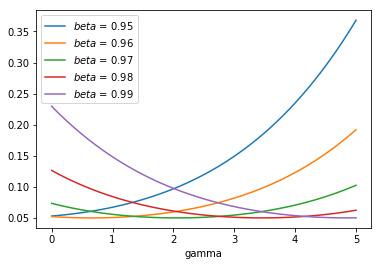

In [101]:
n = 60
N = 5
γ_grid = np.linspace(0, 5, n)
β_grid = np.linspace(0.95, 0.99, N)
crit4_values = np.zeros((n, N))
for i in range(n):
    for j in range(N):
        crit4_values[i, j] = crit4((gamma_grid[i], beta_grid[j]), W)
        
for j in range(N):
    plt.plot(γ_grid, crit4_values[:, j], label=rf'$beta$ = {beta_grid[j]:.2f}')
plt.xlabel('gamma')
plt.legend()
plt.show()

# The Kyle Model

In [1]:
import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import statsmodels.formula.api as sm

In [3]:
# load data from pickle files
AAPL = pickle.load(open("AAPL", "rb"))
C = pickle.load(open("C", "rb"))
GBX = pickle.load(open("GBX", "rb"))
SPY = pickle.load(open("SPY", "rb"))
THO = pickle.load(open("THO", "rb"))

## Exercise 1

In [92]:
class orderbook:
    
    def __init__(self, orderbook):
        
        self.timestamp = orderbook[0]
        orderbook = pd.DataFrame.from_dict(orderbook[1], orient='index')
        orderbook.drop(columns=[2, 3], inplace=True)
        orderbook.reset_index(inplace=True)
        orderbook.columns = ['price', 'quantity', 'side']
        orderbook.sort_values('price', inplace=True)
        buy = orderbook[orderbook.side == 'B'].sort_values('price', ascending=False)
        buy['y'] = -buy['quantity'].cumsum()  # buying = selling negative assets
        
        sell = orderbook[orderbook.side == 'S'].sort_values('price', ascending=True)  
        sell['y'] = sell['quantity'].cumsum()
        
        orderbook = pd.concat([buy, sell])
        orderbook.sort_values('price', inplace=True)
        self.orderbook = orderbook
        p0 = self.find_p0()  # get midpoint of BBO
        
        #dataframe with data within 50% of BBO
        self.orderbook50 = orderbook[(orderbook.price <= p0 * 1.5)  & (orderbook.price >= p0 * 0.5)]
        
        #dataframe with data within 5% of BBO
        self.orderbook5 = orderbook[(orderbook.price <= p0 * 1.05) & (orderbook.price >= p0 * 0.95)]

    def plot(self):
        '''plot data'''
        orderbook = self.orderbook
        plt.plot(orderbook.price, orderbook.y, label='Orderbook') 
        plt.xlabel('price')
        plt.ylabel('quantity')
        plt.legend()

    def plot50(self):
        '''plot data within 50% of BBO'''
        orderbook50 = self.orderbook50
        plt.plot(orderbook50.price, orderbook50.y, label='Orderbook') 
        plt.xlabel('price')
        plt.ylabel('quantity')
        plt.legend()

    def OLS(self, orderbook):
        '''regress cumulative sum on price'''
        result = sm.ols(formula="y ~ price", data=orderbook).fit()  
        return result.params

    def plot_estimates(self):
        orderbook5 = self.orderbook5
        orderbook50 = self.orderbook50
        ols_params = self.OLS(orderbook5)  # fit linear regression to data within 5% of BBO
        γ = ols_params[0]
        β = ols_params[1]
        estimate = γ + β * orderbook50.price
        plt.plot(orderbook50.price, estimate, label='Estimate')
        plt.xlim(orderbook50.price.min(), orderbook50.price.max())
        plt.ylim(orderbook50.y.min() * 1.1, orderbook50.y.max() * 1.1)
        plt.xlabel('price')
        plt.ylabel('quantity')
        plt.legend()

    def find_p0(self):
        orderbook = self.orderbook
        best_offer = orderbook[orderbook.side == 'S'].price.min()
        best_bid = orderbook[orderbook.side == 'B'].price.max()
        return (best_offer + best_bid) / 2  # actual midpoint of BBO
    


    
    def find_p0_5(self):
        '''find p for data within 5% of BBO'''
     
        orderbook = self.orderbook
        p0 = self.find_p0()
        best_offer = orderbook[(orderbook.side == 'S') & (orderbook.price <= p0 * 1.05)& (orderbook.price >= p0 * 0.95)].price.min()
        best_bid = orderbook[(orderbook.side == 'B')& (orderbook.price <= p0 * 1.05)& (orderbook.price >= p0 * 0.95)].price.max()
        return (best_offer + best_bid) / 2  # actual midpoint of BBO


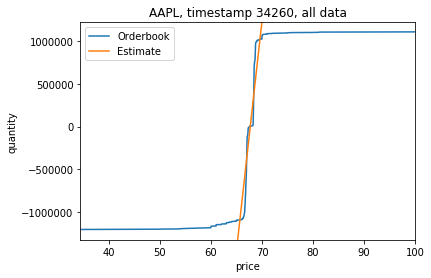

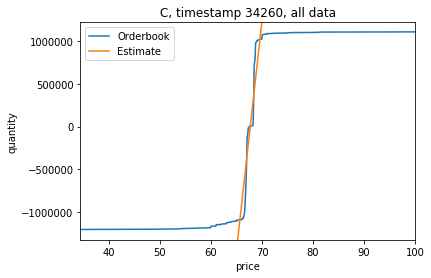

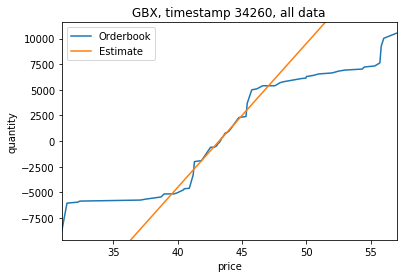

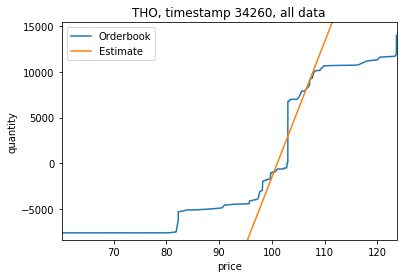

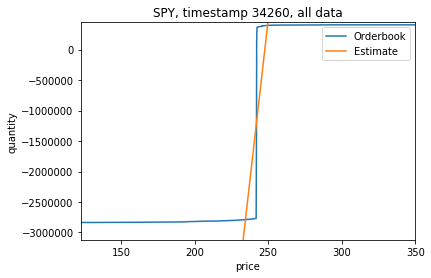

In [27]:
aapl0 = orderbook(C[0])
aapl0.plot()
aapl0.plot_estimates()
plt.title("AAPL, timestamp 34260, all data")
plt.show()

c0 = orderbook(C[0])
c0.plot()
c0.plot_estimates()
plt.title("C, timestamp 34260, all data")
plt.show()

gbx0 = orderbook(GBX[0])
gbx0.plot()
gbx0.plot_estimates()
plt.title("GBX, timestamp 34260, all data")
plt.show()

tho0 = orderbook(THO[0])
tho0.plot()
tho0.plot_estimates()
plt.title("THO, timestamp 34260, all data")
plt.show()

spy0 = orderbook(SPY[0])
spy0.plot()
spy0.plot_estimates()
plt.title("SPY, timestamp 34260, all data")
plt.show()


The model fits well around the BBO and fits poorly away from the BBO. For this reason I will now plot these graphs with only the data within 50% of the BBO:

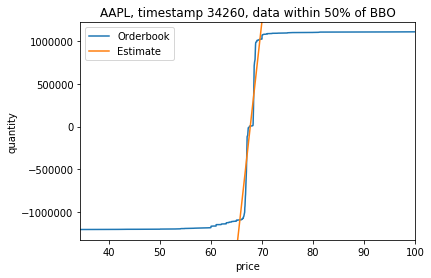

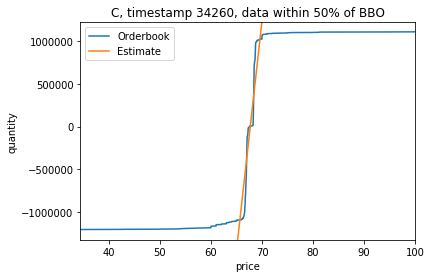

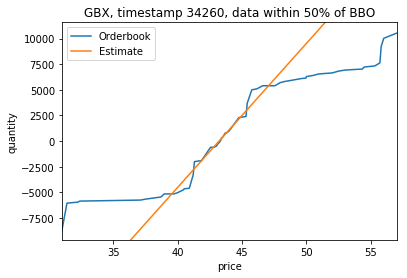

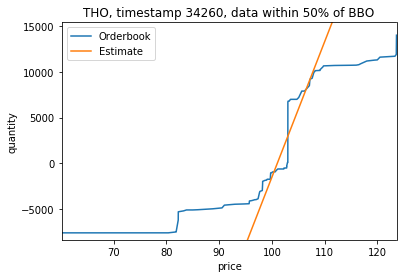

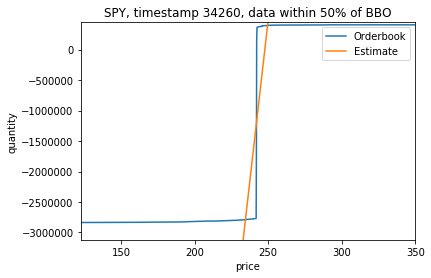

In [29]:
aapl0.plot50()
aapl0.plot_estimates()
plt.title("AAPL, timestamp 34260, data within 50% of BBO")
plt.show()

c0.plot50()
c0.plot_estimates()
plt.title("C, timestamp 34260, data within 50% of BBO")
plt.show()

gbx0.plot50()
gbx0.plot_estimates()
plt.title("GBX, timestamp 34260, data within 50% of BBO")
plt.show()

tho0.plot50()
tho0.plot_estimates()
plt.title("THO, timestamp 34260, data within 50% of BBO")
plt.show()

spy0.plot50()
spy0.plot_estimates()
plt.title("SPY, timestamp 34260, data within 50% of BBO")
plt.show()

## Exercise 2

In [93]:
class ticker:
    
    def __init__(self, orderbooks):
        self.orderbooks = [orderbook(Orderbook) for Orderbook in orderbooks]  # index over all orderbook
        self.timestamps = [orderbook.timestamp for orderbook in self.orderbooks]  # all timestamps
        #self.orderbooks5 = [orderbook(Orderbook).orderbook5 for Orderbook in orderbooks]
    
    def estimateβ(self):
        '''computes estimates of β for each orderbook
        uses data within 5% of the BBO'''
        orderbooks = self.orderbooks
        β = np.array([orderbook.OLS(orderbook.orderbook5)[1] for orderbook in orderbooks]) 
        return β
    
    def estimateγ(self):
        '''computes estimates of γ for each orderbook
        uses data within 5% of the BBO'''
        orderbooks = self.orderbooks
        γ = np.array([orderbook.OLS(orderbook.orderbook5)[0] for orderbook in orderbooks])  
        return γ
    
    def plotβ(self):
        β = self.estimateβ()  
        plt.plot(self.timestamps, β)
        plt.xlabel('timestamp')
        plt.ylabel('Noise/Signal Ratio (β)')
        
    def plot_p0_estimates(self):
        β = self.estimateβ()
        γ = self.estimateγ()
        p0 = - γ / β  # estimate BBO
        plt.plot(self.timestamps, p0, label='Estimated p_0')
        plt.xlabel('Seconds after midnight')
        plt.ylabel('BB0')
        plt.legend()
    
    def plot_p0(self):
        '''plots'''
        orderbooks = self.orderbooks
        p0 = np.array([orderbook.find_p0() for orderbook in orderbooks]) 
        plt.plot(self.timestamps, p0, label='data BBO, all data')
        plt.xlabel('timestamp')
        plt.ylabel('BBO')
        plt.legend()
        
    def plot_p0_5(self):
        '''plots actual p0 for data within 5% of BBO'''
        orderbooks = self.orderbooks
        p0 = np.array([orderbook.find_p0_5() for orderbook in orderbooks]) 
                

        plt.plot(self.timestamps, p0, label='data BBO, data within 5% of BBO')
        plt.xlabel('timestamp')
        plt.ylabel('BBO')
        plt.legend()
    

In [52]:
aapl = ticker(AAPL)
tho = ticker(THO)
spy = ticker(SPY)
gbx = ticker(GBX)
c = ticker(C)

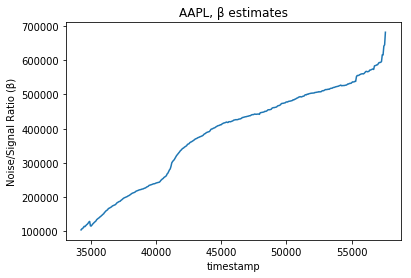

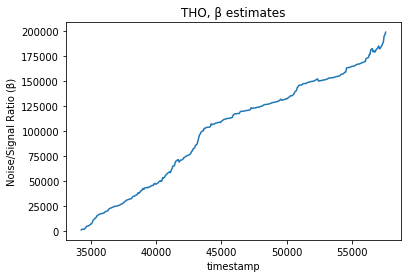

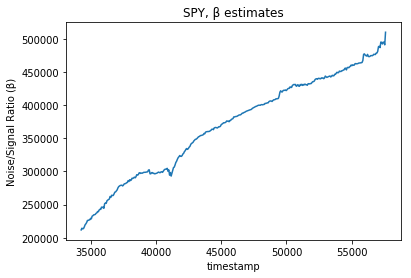

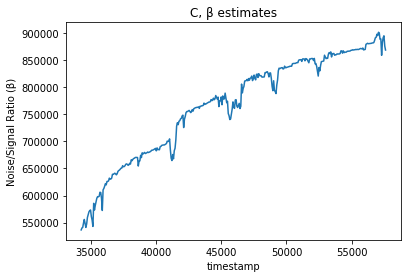

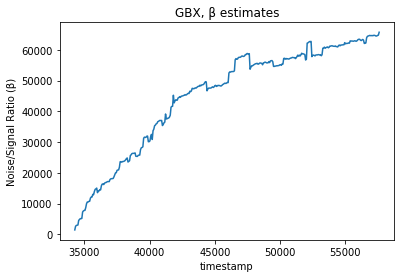

In [37]:
aapl.plotβ()
plt.title("AAPL, β estimates")
plt.show()

tho.plotβ()
plt.title("THO, β estimates")
plt.show()

spy.plotβ()
plt.title("SPY, β estimates")
plt.show()

c.plotβ()
plt.title("C, β estimates")
plt.show()

gbx.plotβ()
plt.title("GBX, β estimates")
plt.show()


## Exercise 3

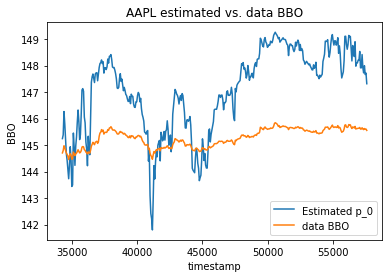

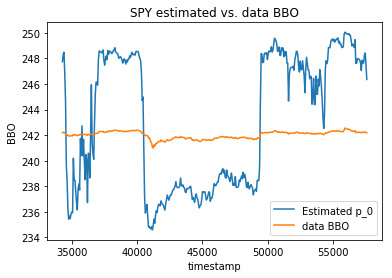

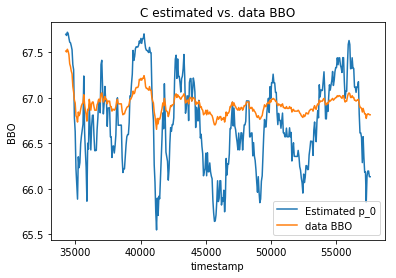

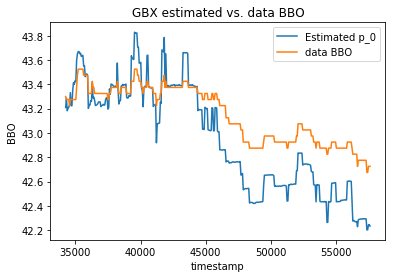

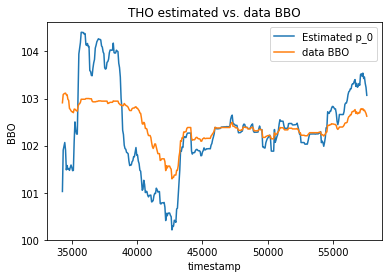

In [50]:
aapl.plot_p0_estimates()
aapl.plot_p0()
plt.title("AAPL estimated vs. data BBO")
plt.show()

spy.plot_p0_estimates()
spy.plot_p0()
plt.title("SPY estimated vs. data BBO")
plt.show()

c.plot_p0_estimates()
c.plot_p0()
plt.title("C estimated vs. data BBO")
plt.show()

gbx.plot_p0_estimates()
gbx.plot_p0()
plt.title("GBX estimated vs. data BBO")
plt.show()

tho.plot_p0_estimates()
tho.plot_p0()
plt.title("THO estimated vs. data BBO")
plt.show()

The estimated $p_0$ has a much larger variance than the actual BBO, but the two appear to have similar trends throughout the day.


The vast difference in variance of the estimated $p_0$ and actual BBO suggests that the model is not a great model for the data. Perhaps the linear assumption in the model is not appropriate for the data.

## Exercise 4

AAPL, SPY, and C data show a fairly constant BBO throughout the day. GBX data shows a significant decrease throughout the day, and THO data shows a slight decrease throughout the day.